In [80]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [103]:
# Import DLC video analysis H5 file
video='coho0006_vi1_AB2018-06-20T11_13_00.avi'  #video file name
DLCscorer='DLC_resnet50_CrossmazeMScJun27shuffle1_200001'  #DLC scorer on h5 file
folder = 'Cohort6_H5s/'  #folder name if h5 file in a separate folder
dataname = folder + str(Path(video).stem) + DLCscorer + '.h5'
print(dataname)

#Save H5 file as a dataframe
Dataframe = pd.read_hdf(os.path.join(dataname))

Cohort6_H5s/coho0006_vi1_AB2018-06-20T09_48_16DLC_resnet50_CrossmazeMScJun27shuffle1_200001.h5


In [104]:
#Let's have a look at the data:
Dataframe.head()

scorer    DLC_resnet50_CrossmazeMScJun27shuffle1_200001              \
bodyparts                                          nose               
coords                                                x           y   
0                                           1081.546509  128.648300   
1                                           1081.041260  128.538498   
2                                           1081.049438  128.587372   
3                                           1080.978882  128.577682   
4                                           1081.151611  128.565842   

scorer                                                                 \
bodyparts                 leftear                            rightear   
coords    likelihood            x           y likelihood            x   
0           0.007685  1202.525513  622.030518   0.005857  1081.176636   
1           0.008737  1202.588135  621.698364   0.011404  1080.855103   
2           0.010152  1202.394409  621.532166   0.009465  1080.808105   
3           0.009621  1202.332275  621.293396   0.009883  1080.765259   
4           0.009929  1203.217651  621.919373   0.005998  1080.956909   

scorer                                         ...                           \
bodyparts                          headcenter  ... lefthindpaw righthindpaw   
coords              y likelihood            x  ...  likelihood            x   
0          125.540955   0.009990  1081.666626  ...    0.019546  1191.662598   
1          125.573578   0.012585  1081.707031  ...    0.019061  1192.570801   
2          125.606766   0.014133  1081.632690  ...    0.022214  1192.640869   
3          125.574997   0.013264  1081.683350  ...    0.019885  1192.785767   
4          125.464966   0.012804  1081.806641  ...    0.019942  1073.768188   

scorer                                                                \
bodyparts                          rewardcup1                          
coords              y likelihood            x           y likelihood   
0          615.954651   0.022903  1074.301147  121.935982   0.979608   
1          614.981079   0.036225  1074.451782  122.171959   0.981039   
2          615.099304   0.035018  1074.578735  122.130981   0.982179   
3          615.280212   0.030097  1074.668335  122.102554   0.981737   
4          124.429649   0.023376  1074.582275  122.042709   0.981143   

scorer                                          
bodyparts   rewardcup2                          
coords               x            y likelihood  
0          1103.530396  1106.604126   0.535418  
1          1103.604126  1106.544800   0.546584  
2          1103.173828  1106.373657   0.539706  
3          1103.033569  1106.152466   0.567738  
4          1103.036743  1106.475098   0.538482  

[5 rows x 57 columns]

In [105]:
# split trials based on likelihood of bodyparts
    #try plot likelihood of some bodyparts (one figure per part) by frames
      #check if trials are "visible"

#when does a trial start (when the likelihood changes from l1 to l2)
  #find start and end frames for all trials
bodyparts = ['tailbase', 'bodycenter', 'neck'] # these are the body parts that seem interesting to define trials

pcutoff = 0.6   #likelihood threshold to define trials by
scorer=Dataframe.columns.get_level_values(0)[0] # gets the name of the scorer from the dataframe
Index1=Dataframe[scorer]['neck']['likelihood'].values > pcutoff  # Identifies frames (as true) with likelihood values > selected threshold
Index2=Dataframe[scorer]['neck']['likelihood'].values > pcutoff  # Identifies frames (as true) with likelihood values > selected threshold
window = 25 # Number of frames to check 

for f, value in enumerate(Index1):
    # if f+window exceeds total number of frames 
    if f+window > Index1.size:
        break
    # if it is diff, it has crossed
    if value != Index1[f+1]:
        # if it crossed, check the next window of frames if they are the same as Index[f+1]
        windowToBeChecked = Index1[f+1:f+1+window]
        if (np.sum(windowToBeChecked == Index1[f+1])) == window:
            # we will do something
            pass
        else:
            # we will do something else
            Index1[f+1] = value
    else:
        # we might need to do something
        pass

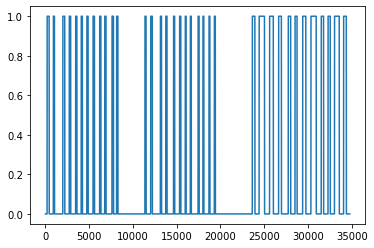

In [106]:
plt.plot(Index1) # plots likelihood values that meet criteria for trials

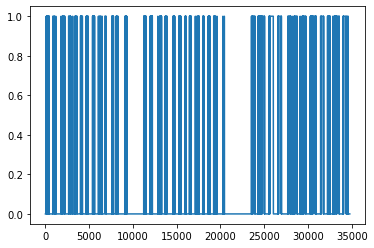

In [107]:
 plt.plot(Index2) # plots likelihood values (y-axis) against frames (x-axis)

In [108]:
startEndTrials = np.where(Index1[:-1] != Index1[1:])[0]  #Creates list containing both trial start and end frames

In [109]:
print(startEndTrials)

#Creates separate lists for start and end frames for each trial
startT, endT = startEndTrials[::2],startEndTrials[1::2]
print(startT, endT)

[  188   423   902  1031  1984  2206  2719  2884  3448  3593  4085  4219
  4729  4875  5438  5602  6192  6335  6774  6919  7603  7773  8130  8278
 11367 11497 12026 12212 13131 13263 13746 13889 14635 14764 15325 15468
 15973 16070 16552 16662 17442 17557 17994 18099 18686 18787 19297 19413
 23636 23933 24415 25031 25610 26037 26642 26962 27744 28021 28516 28750
 29391 29752 30334 30940 31511 31781 32289 32544 33027 33572 34066 34381]
[  188   902  1984  2719  3448  4085  4729  5438  6192  6774  7603  8130
 11367 12026 13131 13746 14635 15325 15973 16552 17442 17994 18686 19297
 23636 24415 25610 26642 27744 28516 29391 30334 31511 32289 33027 34066] [  423  1031  2206  2884  3593  4219  4875  5602  6335  6919  7773  8278
 11497 12212 13263 13889 14764 15468 16070 16662 17557 18099 18787 19413
 23933 25031 26037 26962 28021 28750 29752 30940 31781 32544 33572 34381]


In [110]:
#create dataframe for trials with columns for start and end frames 
trials_dict= {'Trials': range(1, len(startT)+1),
              'StartT': startT,
              'EndT': endT}

trials_df= pd.DataFrame(trials_dict)
trials_df.set_index('Trials', inplace=True)
for index , row in trials_df.iterrows():
    trial= [row['StartT'], row['EndT']]
    
trials_df

StartT   EndT
Trials               
1          188    423
2          902   1031
3         1984   2206
4         2719   2884
5         3448   3593
6         4085   4219
7         4729   4875
8         5438   5602
9         6192   6335
10        6774   6919
11        7603   7773
12        8130   8278
13       11367  11497
14       12026  12212
15       13131  13263
16       13746  13889
17       14635  14764
18       15325  15468
19       15973  16070
20       16552  16662
21       17442  17557
22       17994  18099
23       18686  18787
24       19297  19413
25       23636  23933
26       24415  25031
27       25610  26037
28       26642  26962
29       27744  28021
30       28516  28750
31       29391  29752
32       30334  30940
33       31511  31781
34       32289  32544
35       33027  33572
36       34066  34381

In [111]:
# you can calculate the interval between trials and use this and std dev to check if another animal has started
iti = np.mean(endT-startT)
iti_sd = np.std(endT-startT)

In [112]:
print(iti, iti_sd)

221.55555555555554 136.64683686310255


In [121]:
# define same size ROIs (rewards zones and for starting zones)
    # we need to import roi csv file into code

roi_file = 'Cohort6_ROIs/Cohort6_4.csv'
ROIS = pd.read_csv(roi_file)

In [122]:
# Have a look at roi coordinates
ROIS.head()

ROI         TLX         TLY        BRX          BRY
0    Reward_zone_1   965.00625   28.809524  1118.3250   221.833333
1    Reward_zone_2   965.00625  993.928571  1118.3250  1184.071429
2  Starting_zone_2  1536.19375  527.214286  1737.6125   677.023810
3  Starting_zone_1   279.58125  527.214286   474.9875   677.023810
4    Decision_zone   965.00625  527.214286  1118.3250   677.023810

In [123]:
# get the coordinates for maze boundary (diff for zone 1 and 2)
# calculate the inside boundary based on a defined deltaY
ROIS = ROIS.set_index('ROI')

In [124]:
#Make ROIS of uniform size based on deltaZ
deltaZ = 150 
ROIS.loc['Starting_zone_1','BRX'] = ROIS.loc['Starting_zone_1','TLX']+deltaZ
ROIS.loc['Starting_zone_2','TLX'] = ROIS.loc['Starting_zone_2','BRX']-deltaZ
ROIS.loc['Reward_zone_1','BRY'] = ROIS.loc['Reward_zone_1','TLY']+deltaZ
ROIS.loc['Reward_zone_2','TLY'] = ROIS.loc['Reward_zone_2','BRY']-deltaZ
ROIS
ROIS.head()
    

TLX          TLY         BRX          BRY
ROI                                                              
Reward_zone_1     965.00625    28.809524  1118.32500   178.809524
Reward_zone_2     965.00625  1034.071429  1118.32500  1184.071429
Starting_zone_2  1587.61250   527.214286  1737.61250   677.023810
Starting_zone_1   279.58125   527.214286   429.58125   677.023810
Decision_zone     965.00625   527.214286  1118.32500   677.023810

In [125]:
#Create unifromly defined interzones 1-4 on cross maze
ROIS.loc['Interzone_1'] = [(ROIS.loc['Starting_zone_1', 'BRX']), (ROIS.loc['Decision_zone', 'TLY']), (ROIS.loc['Decision_zone', 'TLX']), (ROIS.loc['Decision_zone', 'BRY'])]
ROIS.loc['Interzone_2'] = [(ROIS.loc['Decision_zone', 'TLX']), (ROIS.loc['Reward_zone_1', 'BRY']), (ROIS.loc['Decision_zone', 'BRX']), (ROIS.loc['Decision_zone', 'TLY'])]
ROIS.loc['Interzone_3'] = [(ROIS.loc['Decision_zone', 'BRX']), (ROIS.loc['Decision_zone', 'TLY']), (ROIS.loc['Starting_zone_2', 'TLX']), (ROIS.loc['Decision_zone', 'BRY'])]
ROIS.loc['Interzone_4'] = [(ROIS.loc['Decision_zone', 'TLX']), (ROIS.loc['Decision_zone', 'BRY']), (ROIS.loc['Decision_zone', 'BRX']), (ROIS.loc['Reward_zone_2', 'TLY'])]
ROIS

TLX          TLY         BRX          BRY
ROI                                                              
Reward_zone_1     965.00625    28.809524  1118.32500   178.809524
Reward_zone_2     965.00625  1034.071429  1118.32500  1184.071429
Starting_zone_2  1587.61250   527.214286  1737.61250   677.023810
Starting_zone_1   279.58125   527.214286   429.58125   677.023810
Decision_zone     965.00625   527.214286  1118.32500   677.023810
Interzone_1       429.58125   527.214286   965.00625   677.023810
Interzone_2       965.00625   178.809524  1118.32500   527.214286
Interzone_3      1118.32500   527.214286  1587.61250   677.023810
Interzone_4       965.00625   677.023810  1118.32500  1034.071429

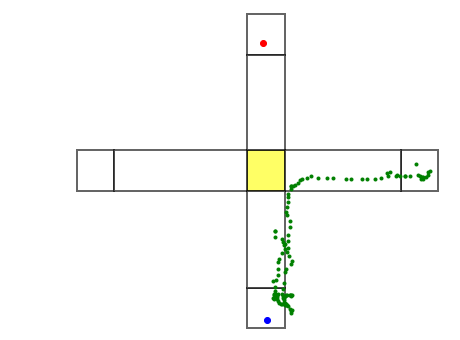

In [129]:
# Plots ROIs and trajectory of selected bodypart based on likelihood values
import matplotlib.patches as patches
from matplotlib.pyplot import figure
fig,ax = plt.subplots(1, figsize=(8,6))
trial= 1
bp='neck'    # bodypart to track/plot
Index=Dataframe[scorer][bp]['likelihood'].values[startT[trial]:endT[trial]]> 0.5
xbp = Dataframe[scorer][bp]['x'].values[startT[trial]:endT[trial]]     
ybp = Dataframe[scorer][bp]['y'].values[startT[trial]:endT[trial]]     

# Create variables to represent Reward cup likelihood values 
IndexR1=Dataframe[scorer]['rewardcup1']['likelihood'].values > 0.9
IndexR2=Dataframe[scorer]['rewardcup2']['likelihood'].values > 0.9
R1x = Dataframe[scorer]['rewardcup1']['x'].values[IndexR1]
R1y = Dataframe[scorer]['rewardcup1']['y'].values[IndexR1]
R2x = Dataframe[scorer]['rewardcup2']['x'].values[IndexR2]
R2y = Dataframe[scorer]['rewardcup2']['y'].values[IndexR2]

#plot bodypart + bounding boxes for rois
plt.plot(xbp[Index],ybp[Index],'g.')
plt.plot(np.mean(R1x), np.mean(R1y),'ro') # Plot location of reward cups based on mean/median 
plt.plot(np.mean(R2x), np.mean(R2y),'bo')
#plt.plot(np.median(R2x), np.median(R2y),'bo')

rect = patches.Rectangle((ROIS.loc['Reward_zone_1', 'TLX'], ROIS.loc['Reward_zone_1', 'TLY']),ROIS.loc['Reward_zone_1', 'BRX']-ROIS.loc['Reward_zone_1', 'TLX'],ROIS.loc['Reward_zone_1', 'BRY']-ROIS.loc['Reward_zone_1', 'TLY'],linewidth=2,edgecolor='black',facecolor='white', alpha= 0.6)
ax.add_patch(rect)
rect = patches.Rectangle((ROIS.loc['Reward_zone_2', 'TLX'], ROIS.loc['Reward_zone_2', 'TLY']),ROIS.loc['Reward_zone_2', 'BRX']-ROIS.loc['Reward_zone_2', 'TLX'],ROIS.loc['Reward_zone_2', 'BRY']-ROIS.loc['Reward_zone_2', 'TLY'],linewidth=2,edgecolor='black',facecolor='white', alpha= 0.6)
ax.add_patch(rect)
rect = patches.Rectangle((ROIS.loc['Starting_zone_1', 'TLX'], ROIS.loc['Starting_zone_1', 'TLY']),ROIS.loc['Starting_zone_1', 'BRX']-ROIS.loc['Starting_zone_1', 'TLX'],ROIS.loc['Starting_zone_1', 'BRY']-ROIS.loc['Starting_zone_1', 'TLY'],linewidth=2,edgecolor='black',facecolor='white', alpha= 0.6)
ax.add_patch(rect)
rect = patches.Rectangle((ROIS.loc['Starting_zone_2', 'TLX'], ROIS.loc['Starting_zone_2', 'TLY']),ROIS.loc['Starting_zone_2', 'BRX']-ROIS.loc['Starting_zone_2', 'TLX'],ROIS.loc['Starting_zone_2', 'BRY']-ROIS.loc['Starting_zone_2', 'TLY'],linewidth=2,edgecolor='black',facecolor='white', alpha= 0.6)
ax.add_patch(rect)
rect = patches.Rectangle((ROIS.loc['Decision_zone', 'TLX'], ROIS.loc['Decision_zone', 'TLY']),ROIS.loc['Decision_zone', 'BRX']-ROIS.loc['Decision_zone', 'TLX'],ROIS.loc['Decision_zone', 'BRY']-ROIS.loc['Decision_zone', 'TLY'],linewidth=2,edgecolor='black', facecolor='yellow', alpha= 0.6)
ax.add_patch(rect)
rect = patches.Rectangle((ROIS.loc['Interzone_1', 'TLX'], ROIS.loc['Interzone_1', 'TLY']),ROIS.loc['Interzone_1', 'BRX']-ROIS.loc['Interzone_1', 'TLX'],ROIS.loc['Interzone_1', 'BRY']-ROIS.loc['Interzone_1', 'TLY'],linewidth=2,edgecolor='black',facecolor='white', alpha= 0.6)
ax.add_patch(rect)
rect = patches.Rectangle((ROIS.loc['Interzone_2', 'TLX'], ROIS.loc['Interzone_2', 'TLY']),ROIS.loc['Interzone_2', 'BRX']-ROIS.loc['Interzone_2', 'TLX'],ROIS.loc['Interzone_2', 'BRY']-ROIS.loc['Interzone_2', 'TLY'],linewidth=2,edgecolor='black',facecolor='white', alpha= 0.6)
ax.add_patch(rect)
rect = patches.Rectangle((ROIS.loc['Interzone_3', 'TLX'], ROIS.loc['Interzone_3', 'TLY']),ROIS.loc['Interzone_3', 'BRX']-ROIS.loc['Interzone_3', 'TLX'],ROIS.loc['Interzone_3', 'BRY']-ROIS.loc['Interzone_3', 'TLY'],linewidth=2,edgecolor='black',facecolor='white', alpha= 0.6)
ax.add_patch(rect)
rect = patches.Rectangle((ROIS.loc['Interzone_4', 'TLX'], ROIS.loc['Interzone_4', 'TLY']),ROIS.loc['Interzone_4', 'BRX']-ROIS.loc['Interzone_4', 'TLX'],ROIS.loc['Interzone_4', 'BRY']-ROIS.loc['Interzone_4', 'TLY'],linewidth=2,edgecolor='black',facecolor='white', alpha= 0.6)
ax.add_patch(rect)
plt.ylim(0,1200)
plt.xlim(0,1800)
plt.gca().invert_yaxis() # invert plot y-axis to match y-coordinates
plt.axis('off')
#red_patch = patches.Patch(edgecolor= 'black', facecolor='red', label='Reward Zones')
#green_patch = patches.Patch(edgecolor= 'black', facecolor='green', label='Starting Zones')
#orange_patch = patches.Patch(edgecolor= 'black', facecolor='orange', label='Decision Zone')
#white_patch = patches.Patch(edgecolor= 'black', facecolor='white', label='Interzones')
#plt.legend(handles=[red_patch, green_patch, orange_patch, white_patch])
plt.show()

In [97]:
print(Index)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


In [98]:
#calculate velocity of bodypart
import time_in_each_roi #the function needs to be in the same folder as the notebook
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe[DLCscorer][bp]['x'].values[startT[trial]:endT[trial]].flatten(), Dataframe[DLCscorer][bp]['y'].values[startT[trial]:endT[trial]].flatten()]).T)
fps=20 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]
vbp=vel

#convert ROIS to dictionary for use in time_in_roi function below
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((xbp[Index], ybp[Index], vbp[Index]))

rois = {'Reward_zone_1': position((ROIS.loc['Reward_zone_1', 'TLX'], ROIS.loc['Reward_zone_1', 'TLY']), (ROIS.loc['Reward_zone_1', 'BRX'], ROIS.loc['Reward_zone_1', 'BRY'])),
        'Reward_zone_2': position((ROIS.loc['Reward_zone_2', 'TLX'], ROIS.loc['Reward_zone_2', 'TLY']), (ROIS.loc['Reward_zone_2', 'BRX'], ROIS.loc['Reward_zone_2', 'BRY'])), 
        'Decision_zone': position((ROIS.loc['Decision_zone', 'TLX'], ROIS.loc['Decision_zone', 'TLY']), (ROIS.loc['Decision_zone', 'BRX'], ROIS.loc['Decision_zone', 'BRY'])),
        'Starting_zone_1': position((ROIS.loc['Starting_zone_1', 'TLX'], ROIS.loc['Starting_zone_1', 'TLY']), (ROIS.loc['Starting_zone_1', 'BRX'], ROIS.loc['Starting_zone_1', 'BRY'])),
        'Starting_zone_2': position((ROIS.loc['Starting_zone_2', 'TLX'], ROIS.loc['Starting_zone_2', 'TLY']), (ROIS.loc['Starting_zone_2', 'BRX'], ROIS.loc['Starting_zone_2', 'BRY'])),
        'Interzone_1': position((ROIS.loc['Interzone_1', 'TLX'], ROIS.loc['Interzone_1', 'TLY']), (ROIS.loc['Interzone_1', 'BRX'], ROIS.loc['Interzone_1', 'BRY'])),
        'Interzone_2': position((ROIS.loc['Interzone_2', 'TLX'], ROIS.loc['Interzone_2', 'TLY']), (ROIS.loc['Interzone_2', 'BRX'], ROIS.loc['Interzone_2', 'BRY'])),
        'Interzone_3': position((ROIS.loc['Interzone_3', 'TLX'], ROIS.loc['Interzone_3', 'TLY']), (ROIS.loc['Interzone_3', 'BRX'], ROIS.loc['Interzone_3', 'BRY'])),
        'Interzone_4': position((ROIS.loc['Interzone_4', 'TLX'], ROIS.loc['Interzone_4', 'TLY']), (ROIS.loc['Interzone_4', 'BRX'], ROIS.loc['Interzone_4', 'BRY']))}
print(rois)

{'Reward_zone_1': position(topleft=(958.99375, 28.80952381), bottomright=(1109.30625, 178.80952381)), 'Reward_zone_2': position(topleft=(958.99375, 1039.833333), bottomright=(1109.30625, 1189.833333)), 'Decision_zone': position(topleft=(958.99375, 518.5714286), bottomright=(1109.30625, 679.904762)), 'Starting_zone_1': position(topleft=(252.525, 518.5714286), bottomright=(402.525, 679.9047619)), 'Starting_zone_2': position(topleft=(1587.6125, 518.5714286), bottomright=(1737.6125, 679.904762)), 'Interzone_1': position(topleft=(402.525, 518.5714286), bottomright=(958.99375, 679.904762)), 'Interzone_2': position(topleft=(958.99375, 175.928571), bottomright=(1109.30625, 518.5714286)), 'Interzone_3': position(topleft=(1109.30625, 518.5714286), bottomright=(1587.6125, 679.904762)), 'Interzone_4': position(topleft=(958.99375, 677.0238095238095), bottomright=(1109.30625, 1036.952381))}


In [99]:
#the function needs to be in the same folder as the notebook
bp_tracking = np.array((xbp[Index], ybp[Index], vbp[Index])) #array of x,y likelihood values and velocity  of bodypart
time_in_rois = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=20) #Calculates time in each roi for bodypart

#print results:
time_in_rois

C:\Users\ODERINDE IYANU\Desktop\DLCutils-master\time_in_each_roi.py:142: UserWarning: Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.
  warnings.warn("Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.")


{'transitions_per_roi': {'tot': 0.0},
 'cumulative_time_in_roi': {'tot': 0.0},
 'cumulative_time_in_roi_sec': {'tot': 0.0},
 'avg_time_in_roi': {'tot': 0.0},
 'avg_time_in_roi_sec': {'tot': 0.0},
 'avg_vel_in_roi': {'tot': 0.0}}

In [100]:
#calculates which roi is the closest to the bodypart at each frame
roi_per_frame= time_in_each_roi.get_roi_at_each_frame(bp_tracking.T, rois, check_inroi=True)
roi_per_frame

()

In [101]:
#Latency to decision 
i=0
if roi_per_frame[i] == 'Starting_zone_1' or roi_per_frame[i] == 'Interzone_1':
    cumTimeInRoiSec= time_in_rois['cumulative_time_in_roi_sec'] #selects cumulative time in trial-specific rois in secs
    latency_to_decision= cumTimeInRoiSec['Interzone_1'] + cumTimeInRoiSec['Decision_zone'] #Sums time spent in interzone and decision zone for trial
    print(latency_to_decision)
elif roi_per_frame[i] == 'Starting_zone_2' or roi_per_frame[i] == 'Interzone_3':
    cumTimeInRoiSec= time_in_rois['cumulative_time_in_roi_sec'] #selects cumulative time in trial-specific rois in secs
    latency_to_decision= cumTimeInRoiSec['Interzone_3'] + cumTimeInRoiSec['Decision_zone'] #Sums time spent in interzone and decision zone for trial
    print(latency_to_decision)
elif roi_per_frame[i] != 'Starting_zone_1' or roi_per_frame[i] != 'Starting_zone_2': 
        i += 2
        if roi_per_frame[i] == 'Starting_zone_1' or roi_per_frame[i] == 'Interzone_1':
            cumTimeInRoiSec= time_in_rois['cumulative_time_in_roi_sec'] #selects cumulative time in trial-specific rois in secs
            latency_to_decision= cumTimeInRoiSec['Interzone_1'] + cumTimeInRoiSec['Decision_zone'] #Sums time spent in interzone and decision zone for trial
            print(latency_to_decision)
        elif roi_per_frame[i] =='Starting_zone_2' or roi_per_frame[i] == 'Interzone_3':
            cumTimeInRoiSec= time_in_rois['cumulative_time_in_roi_sec'] #selects cumulative time in trial-specific rois in secs
            latency_to_decision= cumTimeInRoiSec['Interzone_3'] + cumTimeInRoiSec['Decision_zone'] #Sums time spent in interzone and decision zone for trial
            print(latency_to_decision)

#Time in Decision Zone
time_in_decision_zone= cumTimeInRoiSec['Decision_zone']
print(time_in_decision_zone)

IndexError: tuple index out of range

In [ ]:
#Alternative (?more accurate) approach to latency to decision (LTD: Latency to decision) and time_in_decision_zone
if 'Interzone_1' in roi_per_frame:
    if 'Interzone_2' in roi_per_frame:
        if (roi_per_frame.index('Interzone_2') > roi_per_frame.index('Decision_zone')) and (roi_per_frame.index('Decision_zone') > roi_per_frame.index('Interzone_1')):
            LTD = roi_per_frame.index('Interzone_2') - roi_per_frame.index('Interzone_1')
            TIDZ = roi_per_frame.index('Interzone_2') - roi_per_frame.index('Decision_zone')
    elif 'Interzone_4' in roi_per_frame:
        if (roi_per_frame.index('Interzone_4') > roi_per_frame.index('Decision_zone')) and (roi_per_frame.index('Decision_zone') > roi_per_frame.index('Interzone_1')):
            LTD = roi_per_frame.index('Interzone_4') - roi_per_frame.index('Interzone_1')
            TIDZ = roi_per_frame.index('Interzone_4') - roi_per_frame.index('Decision_zone')
elif 'Interzone_3' in roi_per_frame:
    if 'Interzone_2' in roi_per_frame:
        if (roi_per_frame.index('Interzone_2') > roi_per_frame.index('Decision_zone')) and (roi_per_frame.index('Decision_zone') > roi_per_frame.index('Interzone_3')):
            LTD = roi_per_frame.index('Interzone_2') - roi_per_frame.index('Interzone_3')
            TIDZ = roi_per_frame.index('Interzone_2') - roi_per_frame.index('Decision_zone')
    elif 'Interzone_4' in roi_per_frame:
        if (roi_per_frame.index('Interzone_4') > roi_per_frame.index('Decision_zone')) and (roi_per_frame.index('Decision_zone') > roi_per_frame.index('Interzone_3')):
            LTD = roi_per_frame.index('Interzone_4') - roi_per_frame.index('Interzone_3')
            TIDZ = roi_per_frame.index('Interzone_4') - roi_per_frame.index('Decision_zone')
FPS = 20
latency_to_decision = LTD/FPS
time_in_decisionzone = TIDZ/FPS
print(latency_to_decision)
print(time_in_decisionzone)

In [ ]:
#Latency to reward
if 'Reward_zone_1' in roi_per_frame: # check if trial ends at reward_zone_1
    if 'Interzone_2' in roi_per_frame: # check if trial appropriately has interzone 2
        if 'Interzone_1' in roi_per_frame: #check if mouse passed through interzone 1 (i.e trial started at startzone 1)
            #check for sequence of ROI entry
            if (roi_per_frame.index('Reward_zone_1') > roi_per_frame.index('Interzone_2')) and (roi_per_frame.index('Interzone_2') > roi_per_frame.index('Decision_zone')) and (roi_per_frame.index('Decision_zone') > roi_per_frame.index('Interzone_1')):
                #calculate LTR
                LTR = roi_per_frame.index('Reward_zone_1') - roi_per_frame.index('Interzone_1')
        elif 'Interzone_3' in roi_per_frame: # for trials starting at startzone 2
            #check sequence of ROI entry
            if (roi_per_frame.index('Reward_zone_1') > roi_per_frame.index('Interzone_2')) and (roi_per_frame.index('Interzone_2') > roi_per_frame.index('Decision_zone')) and (roi_per_frame.index('Decision_zone') > roi_per_frame.index('Interzone_3')):
                #calculate ROI entry
                LTR = roi_per_frame.index('Reward_zone_1') - roi_per_frame.index('Interzone_3')
elif 'Reward_zone_2' in roi_per_frame: # check if trial ends at rewardzone 2
    if 'Interzone_4' in roi_per_frame: #confirm that trial appropriately has interzone 4
        if 'Interzone_1' in roi_per_frame: #for trials beginning at startzone 1
            #check sequence of ROI entry
            if (roi_per_frame.index('Reward_zone_2') > roi_per_frame.index('Interzone_4')) and (roi_per_frame.index('Interzone_4') > roi_per_frame.index('Decision_zone')) and (roi_per_frame.index('Decision_zone') > roi_per_frame.index('Interzone_1')):
                #calculate LTR
                LTR = roi_per_frame.index('Reward_zone_2') - roi_per_frame.index('Interzone_1')
        elif 'Interzone_3' in roi_per_frame: #for trials beginning at starting zone 2
            #check sequence of ROI entry
            if (roi_per_frame.index('Reward_zone_2') > roi_per_frame.index('Interzone_4')) and (roi_per_frame.index('Interzone_4') > roi_per_frame.index('Decision_zone')) and (roi_per_frame.index('Decision_zone') > roi_per_frame.index('Interzone_3')):
                #calculate LTR
                LTR = roi_per_frame.index('Reward_zone_2') - roi_per_frame.index('Interzone_3')
FPS=20
#convert LTR (in number of frames) to LTR (in seconds)
latency_to_reward= LTR/FPS
print(latency_to_reward)